In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [5]:
data_url = 'https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv'

df = pd.read_csv(data_url)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# linear regression model to see if BMI predicts blood glucose (NB not causality)

X = df["BMI"].to_numpy().reshape(-1, 1)
y = df["Glucose"].to_numpy().reshape(-1, 1)



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


In [16]:
regr = linear_model.LinearRegression() 

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)



In [21]:
print(f"Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# %.2f rounds to 2 significant figures

print(f"Coefficients: {regr.coef_}")

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

Coefficient of determination: 0.05
Coefficients: [[0.88558366]]
Mean squared error: 1070.586081656323


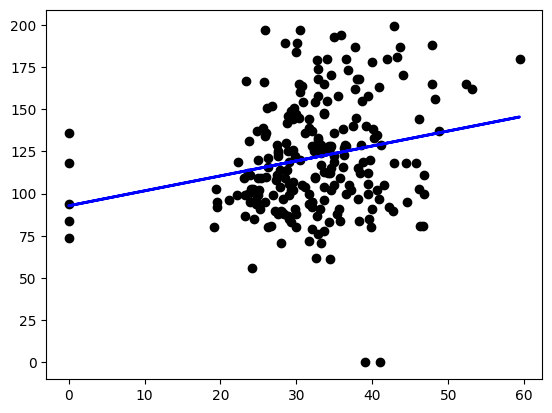

In [26]:
plt.scatter(X_test, y_test, color = "black")
plt.plot(X_test, y_pred, color = "blue", linewidth = 2)
plt.show()



Text(0.5, 1.0, 'BMI as a predictor of blood glucose')

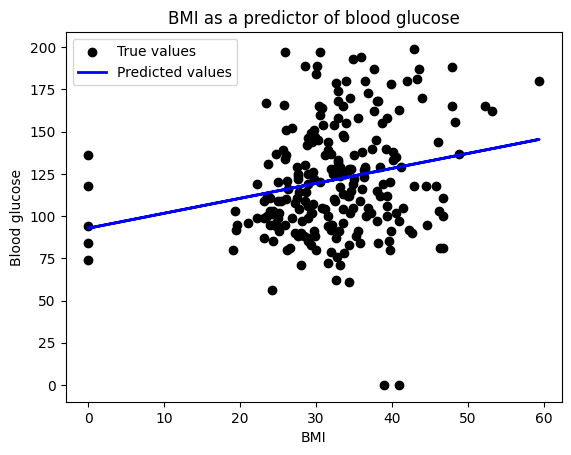

In [27]:
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
 
plt.xlabel('BMI')
plt.ylabel('Blood glucose')
 
plt.legend(loc="upper left")
 
plt.title('BMI as a predictor of blood glucose')

In [32]:
prediction_df = pd.DataFrame()

prediction_df["BMI"] = np.arange(60, 70)

prediction_df["Glucose"] = regr.predict(np.arange(60, 70).reshape(-1, 1))

prediction_df



,BMI,Glucose
0,60,145.940854
1,61,146.826438
2,62,147.712022
3,63,148.597605
4,64,149.483189
5,65,150.368773
6,66,151.254356
7,67,152.139940
8,68,153.025524
9,69,153.911107


Text(0.5, 1.0, 'BMI as a predictor of blood glucose')

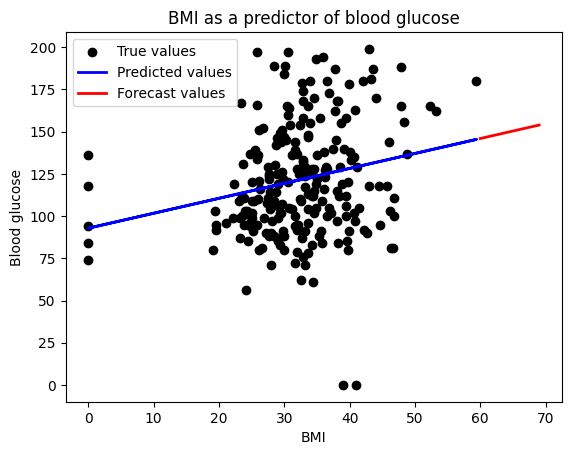

In [34]:
plt.scatter(X_test, y_test, color='black', label='True values')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted values')
plt.plot(prediction_df["BMI"], prediction_df["Glucose"], color = "red", linewidth = 2, label = "Forecast values")
plt.xlabel('BMI')
plt.ylabel('Blood glucose')
 
plt.legend(loc="upper left")
 
plt.title('BMI as a predictor of blood glucose')

In [ ]:
# see if BMI and blood pressure together are a better predictor of blood glucose
# X and y
# train test split
# make a regression object
# fit and predict
# check out our coefficients etc.
#put in some values to predict outcomes

